# Eigenface example


In [11]:
import numpy as np # for numerical operations
import imageio # for reading images

In [12]:
# Định nghĩa các biến và đường dẫn:

# path: Đường dẫn tới thư mục chứa cơ sở dữ liệu hình ảnh.
# ids: Một dãy số từ 1 đến 15, đại diện cho 15 người.
# states: Một danh sách các trạng thái khác nhau của khuôn mặt (ví dụ: đeo kính, cười, buồn ngủ, v.v.).
# prefix: Tiền tố của tên tệp hình ảnh.
# surfix: Hậu tố của tên tệp hình ảnh (định dạng .pgm).


path = 'unpadded/' # đường dẫn tới cơ sở dữ liệu
ids = range(1, 16) # 15 người
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'

fn = path + prefix + '01' + '.' + states[0] + surfix
im = imageio.imread(fn)
h = 116 # height 
w = 98 # width
D = h * w
N = len(states)*15 

X = np.zeros((D, N))

C:\Users\vulin\AppData\Local\Temp\ipykernel_9224\771639715.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)


In [13]:
# collect all data
# Đoạn mã này thực hiện việc thu thập và xử lý dữ liệu hình ảnh từ một cơ sở dữ liệu.

# Biến cnt được khởi tạo bằng 0. Biến này sẽ được sử dụng để đếm và xác định vị trí cột trong ma trận X nơi dữ liệu hình ảnh sẽ được lưu trữ.
cnt = 0 

#  Vòng lặp này chạy từ 1 đến 15, đại diện cho 15 người khác nhau trong cơ sở dữ liệu.
for person_id in range(1, 16):
    # Vòng lặp này chạy qua từng trạng thái khuôn mặt khác nhau được liệt kê trong danh sách states.
    for state in states:
        # Tên tệp hình ảnh được tạo bằng cách kết hợp đường dẫn (path), tiền tố (prefix), ID người (person_id), trạng thái (state), và hậu tố (surfix). Hàm zfill(2) đảm bảo rằng ID người luôn có hai chữ số (ví dụ: 01, 02, ...).
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        # Hình ảnh được đọc từ tệp fn bằng hàm imageio.imread. Sau đó, hình ảnh được chuyển đổi thành một vector có kích thước D (tổng số pixel trong hình ảnh) và lưu trữ vào cột cnt của ma trận X.
        X[:, cnt] = imageio.imread(fn).reshape(D)
        # Biến cnt được tăng lên 1 để chuẩn bị cho việc lưu trữ hình ảnh tiếp theo vào cột tiếp theo của ma trận X.
        cnt += 1

C:\Users\vulin\AppData\Local\Temp\ipykernel_9224\2749108797.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  X[:, cnt] = imageio.imread(fn).reshape(D)


In [19]:
# Doing PCA, note that each row is a datapoint
# Thư viện scikit-learn cung cấp công cụ PCA để thực hiện Phân tích Thành phần Chín
from sklearn.decomposition import PCA
# Đối tượng PCA được khởi tạo với tham số n_components=100, nghĩa là chúng ta muốn giảm số chiều của dữ liệu xuống còn 100 thành phần chính. k = 100 là số lượng thành phần chính mà chúng ta muốn giữ lại.
pca = PCA(n_components=100) # k = 100 
# Hàm fit được sử dụng để huấn luyện mô hình PCA trên dữ liệu. Dữ liệu đầu vào là ma trận X.T, tức là ma trận chuyển vị của X. Trong ma trận X, mỗi cột đại diện cho một hình ảnh (dữ liệu mẫu), và mỗi hàng đại diện cho một pixel (đặc trưng). Khi chuyển vị (X.T), mỗi hàng sẽ đại diện cho một hình ảnh, và mỗi cột sẽ đại diện cho một pixel.
pca.fit(X.T)
# Hàm fit được sử dụng để huấn luyện mô hình PCA trên dữ liệu. Dữ liệu đầu vào là ma trận X.T, tức là ma trận chuyển vị của X. Trong ma trận X, mỗi cột đại diện cho một hình ảnh (dữ liệu mẫu), và mỗi hàng đại diện cho một pixel (đặc trưng). Khi chuyển vị (X.T), mỗi hàng sẽ đại diện cho một hình ảnh, và mỗi cột sẽ đại diện cho một pixel.

PCA(n_components=100)

In [15]:
# projection matrix 
U = pca.components_.T
# pca.components_ là một thuộc tính của đối tượng PCA sau khi mô hình đã được huấn luyện. Nó chứa các vector thành phần chính, mỗi vector là một thành phần chính.
# Mỗi hàng trong pca.components_ đại diện cho một thành phần chính và mỗi cột đại diện cho một đặc trưng (pixel) trong dữ liệu gốc.
# Hàm T là một thuộc tính của mảng numpy để chuyển vị ma trận. Khi chuyển vị, các hàng trở thành cột và ngược lại.
# Sau khi chuyển vị, mỗi cột của U sẽ đại diện cho một thành phần chính và mỗi hàng sẽ đại diện cho một đặc trưng (pixel).

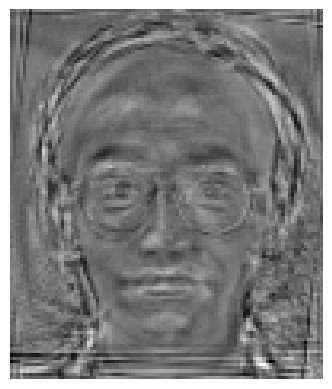

In [23]:
# Đoạn mã này sử dụng thư viện matplotlib để hiển thị và lưu trữ các thành phần chính (eigenfaces) dưới dạng hình ảnh.
# Thư viện matplotlib được sử dụng để vẽ đồ thị và hiển thị hình ảnh.
import matplotlib.pyplot as plt

# Vòng lặp này chạy qua từng thành phần chính trong ma trận U. U.shape[1] là số lượng thành phần chính (số cột của U).
for i in range(U.shape[1]):
    plt.axis('off')
    # U[:, i] lấy cột thứ i của ma trận U, đại diện cho thành phần chính thứ i.
    # reshape(116, 98) chuyển đổi vector thành ma trận có kích thước 116x98 (kích thước của hình ảnh gốc).
    # plt.imshow hiển thị ma trận dưới dạng hình ảnh.
    # interpolation='nearest' sử dụng phương pháp nội suy gần nhất để hiển thị hình ảnh.
    f1 = plt.imshow(U[:, i].reshape(116, 98), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
# Chuyển đổi hình ảnh sang thang độ xám.
    plt.gray()
# fn tạo tên tệp cho hình ảnh, ví dụ: eigenface00.png, eigenface01.png, ...
# plt.savefig lưu hình ảnh vào tệp với tên fn.
# bbox_inches='tight' và pad_inches=0 đảm bảo rằng hình ảnh được lưu mà không có khoảng trắng xung quanh.
    fn = 'eigenface' + str(i).zfill(2) + '.png'
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)
    # plt.show()
    


C:\Users\vulin\AppData\Local\Temp\ipykernel_9224\1625366274.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)


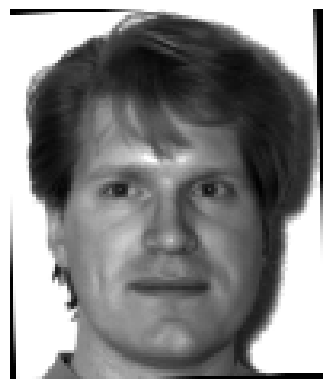

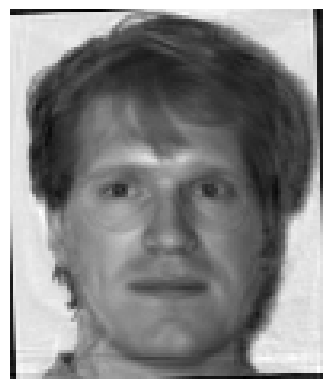

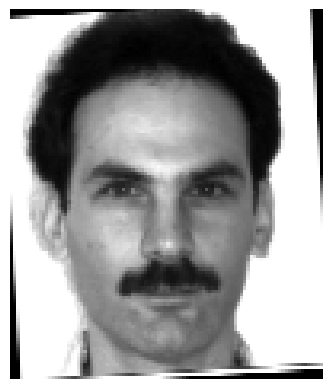

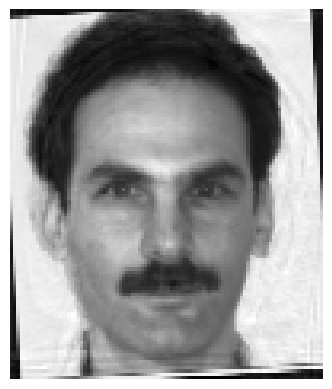

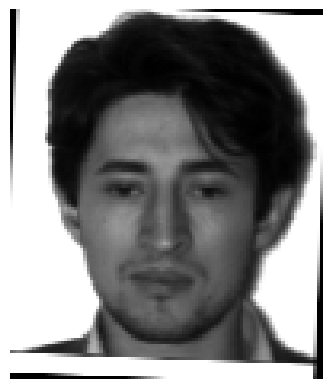

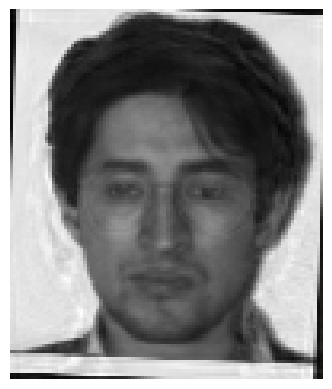

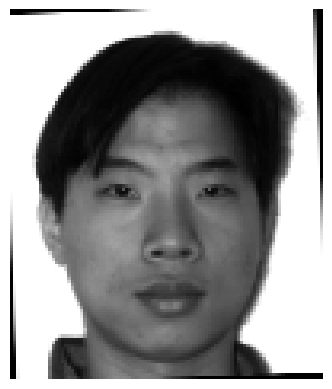

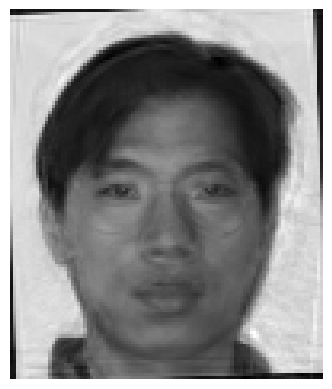

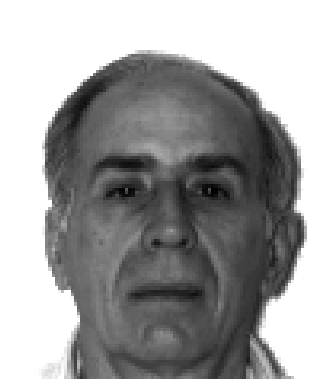

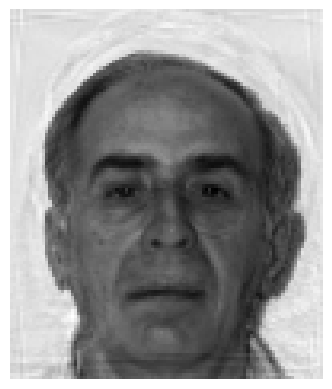

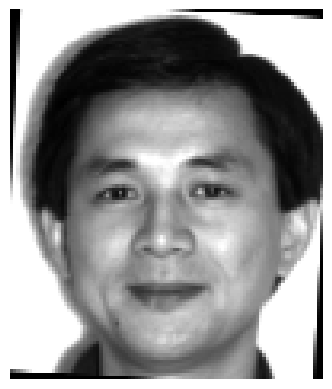

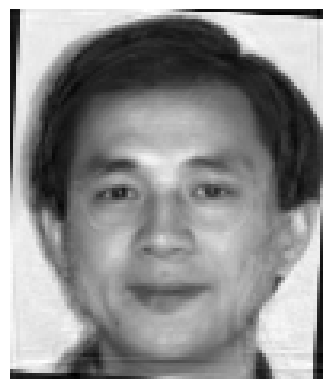

In [17]:
# See reconstruction of first 6 persons 
for person_id in range(1, 7):
        # Vòng lặp này chạy qua trạng thái 'centerlight' của mỗi người. (Có thể có các trạng thái khác như 'leftlight', 'rightlight', v.v., nhưng ở đây chỉ có 'centerlight').
    for state in ['centerlight']:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = imageio.imread(fn)
        plt.axis('off')
#       plt.imshow(im, interpolation='nearest' )

        # Đọc và hiển thị hình ảnh gốc:
        # Tạo tên tệp hình ảnh dựa trên path, prefix, person_id, state, và surfix.
        # Đọc hình ảnh từ tệp bằng imageio.imread.
        # Hiển thị hình ảnh gốc bằng plt.imshow và lưu hình ảnh dưới dạng tệp PNG.
        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()
        
        # reshape and subtract mean, don't forget 
        # Chuyển đổi hình ảnh thành vector và trừ đi giá trị trung bình của PCA.
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)
        # encode
        # Mã hóa hình ảnh bằng cách nhân với ma trận chuyển vị của các thành phần chính (U.T).
        z = U.T.dot(x)
        #decode
        # Giải mã hình ảnh bằng cách nhân với ma trận các thành phần chính (U) và cộng lại giá trị trung bình.
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

        # reshape to orginal dim
        # Chuyển đổi vector tái tạo thành ma trận hình ảnh.
        # Hiển thị hình ảnh tái tạo và lưu trữ dưới dạng tệp PNG.
        im_tilde = x_tilde.reshape(116, 98)
        plt.axis('off')
#         plt.imshow(im_tilde, interpolation='nearest' )
        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'res' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

C:\Users\vulin\AppData\Local\Temp\ipykernel_9224\98045871.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)


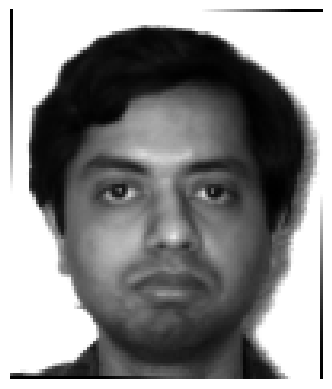

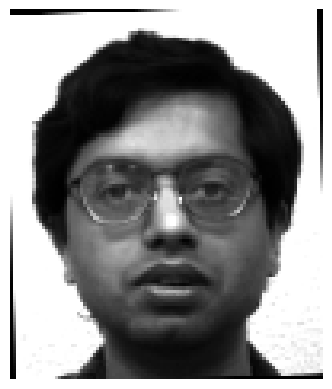

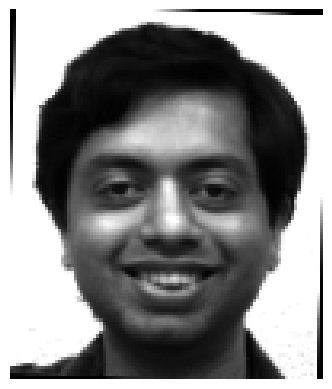

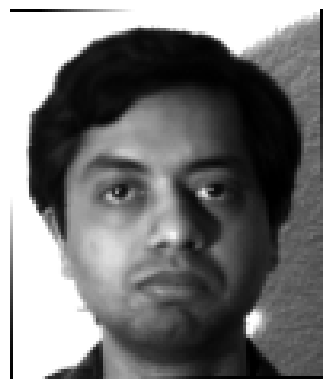

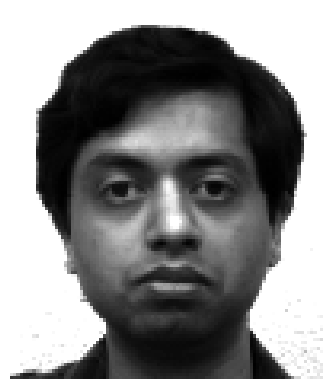

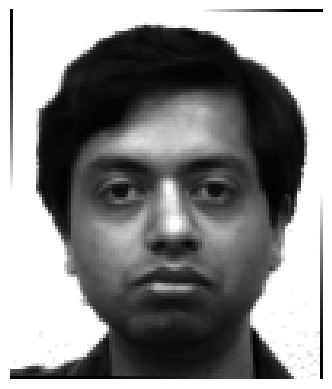

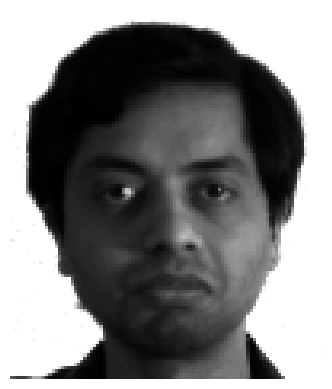

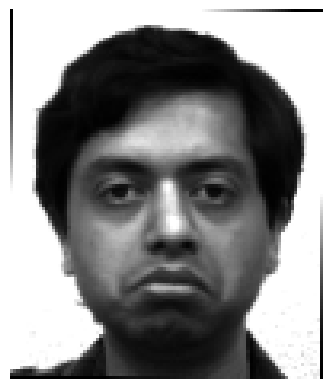

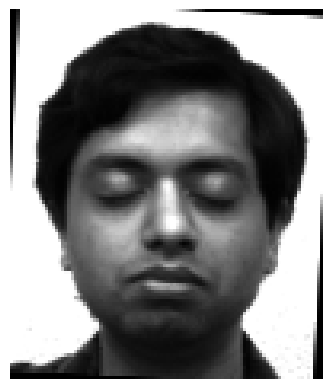

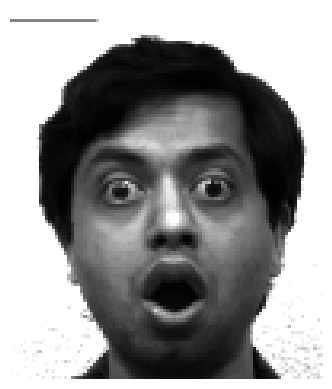

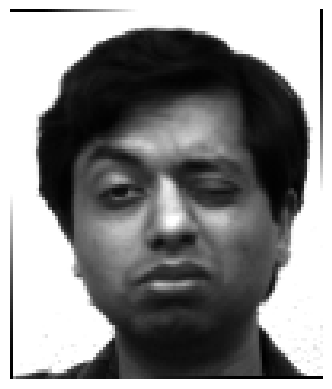

In [18]:
cnt = 0 
for person_id in [10]:
    for ii, state in enumerate(states):
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = imageio.imread(fn)
        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)

        fn = 'ex' + str(ii).zfill(2) +  '.png'
        plt.axis('off')
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
         
        plt.show()
#         cnt += 1 